# 퍼셉트론

## #01. 퍼셉트론의 이해

- 인공신경망(딥러닝)의 기원이 되는 알고리즘.
- 하나 이상의 신호를 입력받아 어떠한 계산을 수행한 후 하나의 Output를 출력한다.
- 퍼셉트론은 `1`과 `0`의 신호만 가질 수 있다.
- 신호가 흐르면 `1`, 흐르지 않으면 `0`이다.
- 단층 퍼셉트론으로는 AND,OR,NOTAND를 구현할 수 있지만 XOR은 할 수 없는데, NAND와 OR연산자의 결과값을 다시 AND하여 표현할 수 있다는 점에서, 입력층과 출력층 사이에 은닉층을 두어 다층퍼셉트론을 만들었다. 

### 1. input이 2개인 퍼셉트론

- $x_1$과 $x_2$는 입력 신호, $y$는 출력 신호, $w_1$과 $w_2$는 가중치를 의미한다. ($w$ : weight)
- $**x$와 가중치 $w$를 곱한 값을 모두 더하여 하나의 값($y$)로 만들어 낸다.**
- 입력 신호가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해지고 그 값들을 모두 더해서 나온 값($y$)이 어떠한 임계값(θ)을 넘을 때만 1로 출력한다.
- 신경망에서 만들어진 값($y$)을 적절한 출력값으로 변환해 주는 함수를 **활성화 함수**라고 한다.
- 입력 신호와 출력 신호를 담고있는 원은 **노드** 혹은 **뉴런**이라 부른다.

![퍼셉트론](res/per.png)

#### y를 수식으로 나타내기

$$y = \left \{ \begin{array}{cc} {0(w_1x_1 + w_2x_2 \leq \theta)}\\{1(w_1x_1 + w_2x_2 > \theta)}\end{array} \right.$$

### 2. 논리회로

- 논리 연산을 통해 전기 장치를 제어하는 통로.
- 컴퓨터 및 기타 전기 장치를 작동하게 만드는 기본 부품이다.
- 불 대수를 이용하여 설계
- 여러 입력을 해도 1개의 출력만 나온다.

![논리회로](res/logic.png)

### 3. 게이트

- 논리 회로의 기초 구성요소.
- 각 게이트는 논리 연산 하나를 구현한다.

![게이트](res/gate.jpg)

#### 게이트의 종류

![게이트의 종류](res/gate2.png)

퍼셉트론과 논리회로의 원리가 동일하기 때문에 퍼셉트론을 사용하여 논리회로를 구현할 수 있다.


-퍼셉트론은 인공 신경망 모델로 선형 분류 문제를 다루기 위해 사용되며, 게이트는 논리 회로에서 기본적인 논리 연산을 수행하는데 사용되는 개념


## #02. 퍼셉트론 구현하기

### 1. 패키지 참조하기

In [14]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense      # 모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import SGD    # 옵티마이저
from tensorflow.keras.losses import mse        # OR게이트에서 사용할 활성화 함수
from pandas import DataFrame

### 2. AND 게이트

#### 1) 데이터 셋 준비하기

##### 랜덤 시드값 고정

In [18]:
np.random.seed(777)
# 넘파이의 난수 생성 함수들을 사용하면, 항상 동일한 난수가 생성 (코드의 일관성을 유지하기 위함)

None


##### 2) 데이터 셋 구성

2차원

In [3]:
train_x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
train_y = np.array([[0], [0], [0], [1]])

x가 0,0이면 y는 0,x가 1,0이면 y는 0 ... x가 1,1이면 y는 1이라는 and 함수다.  

#### 3) 데이터 전처리

- 간단한 데이터 이므로 이 예제에서는 수행하지 않는다.

#### 4) 탐색적 데이터 분석

In [19]:
# flatten : 무조건 1차원으로 풀어버린다. 넘파이 배열을(다차원 행렬)을 무조건 1차원 배열로 변환 / 차원을 하나 줄이는 reshape(-1)와 마찬가지
label = train_y.flatten()
df = DataFrame(train_x, index=label, columns=['x1', 'x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
0,1,0
0,0,1
1,1,1


y가 index인 셈

#### 5) 데이터 셋 분할하기

> 훈련을 위한 데이터 자체가 워낙 양이 적기 때문에 여기서는 진행하지 않음.

#### 6) 모델 개발

##### 모델 정의

In [5]:
model = Sequential() # 객체화 
model.add(Dense(1, input_shape = (2, ), activation = 'linear')) # Dense는 신경망의 학습층, input_shape는 2차원, activation은 활성화 함수 이름
# 처음과 같을 설정하면 중간 레이어는 텐서플로어가 알아서 해준다. 이를 히든레이어라고 함. 
model.compile(optimizer = SGD(), loss = mse, metrics = ['acc']) # 모델 종류에 따라 들어갈 내용이 정해져 있음 
#loss는 손실값 판단 함수, 선형회귀는 주로 SGC(), metrics는 검증할 때 기준으로 삼는것. acc 정확도
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### 학습하기

In [6]:
hist = model.fit(train_x, train_y, epochs=500) # 위의 summmary 를 500번 연습해봐~ , model은 학습할수록 똑똑해짐.

result_df = DataFrame(hist.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500
1/1 [==============================] - 0s 319ms/step - loss: 0.3759 - acc: 0.7500
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3640 - acc: 0.7500
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3528 - acc: 0.7500
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3422 - acc: 0.7500
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3323 - acc: 0.7500
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3229 - acc: 0.7500
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3140 - acc: 0.7500
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3057 - acc: 0.7500
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2978 - acc: 0.7500
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 0.2903 - acc: 0.7500
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 0.283

,loss,acc
epochs,,
1,0.375935,0.75
2,0.364029,0.75
3,0.352813,0.75
4,0.342243,0.75
5,0.332280,0.75
...,...,...
496,0.067083,1.00
497,0.067053,1.00
498,0.067023,1.00


#### 7) 학습 결과 평가

##### 평가결과 시각화

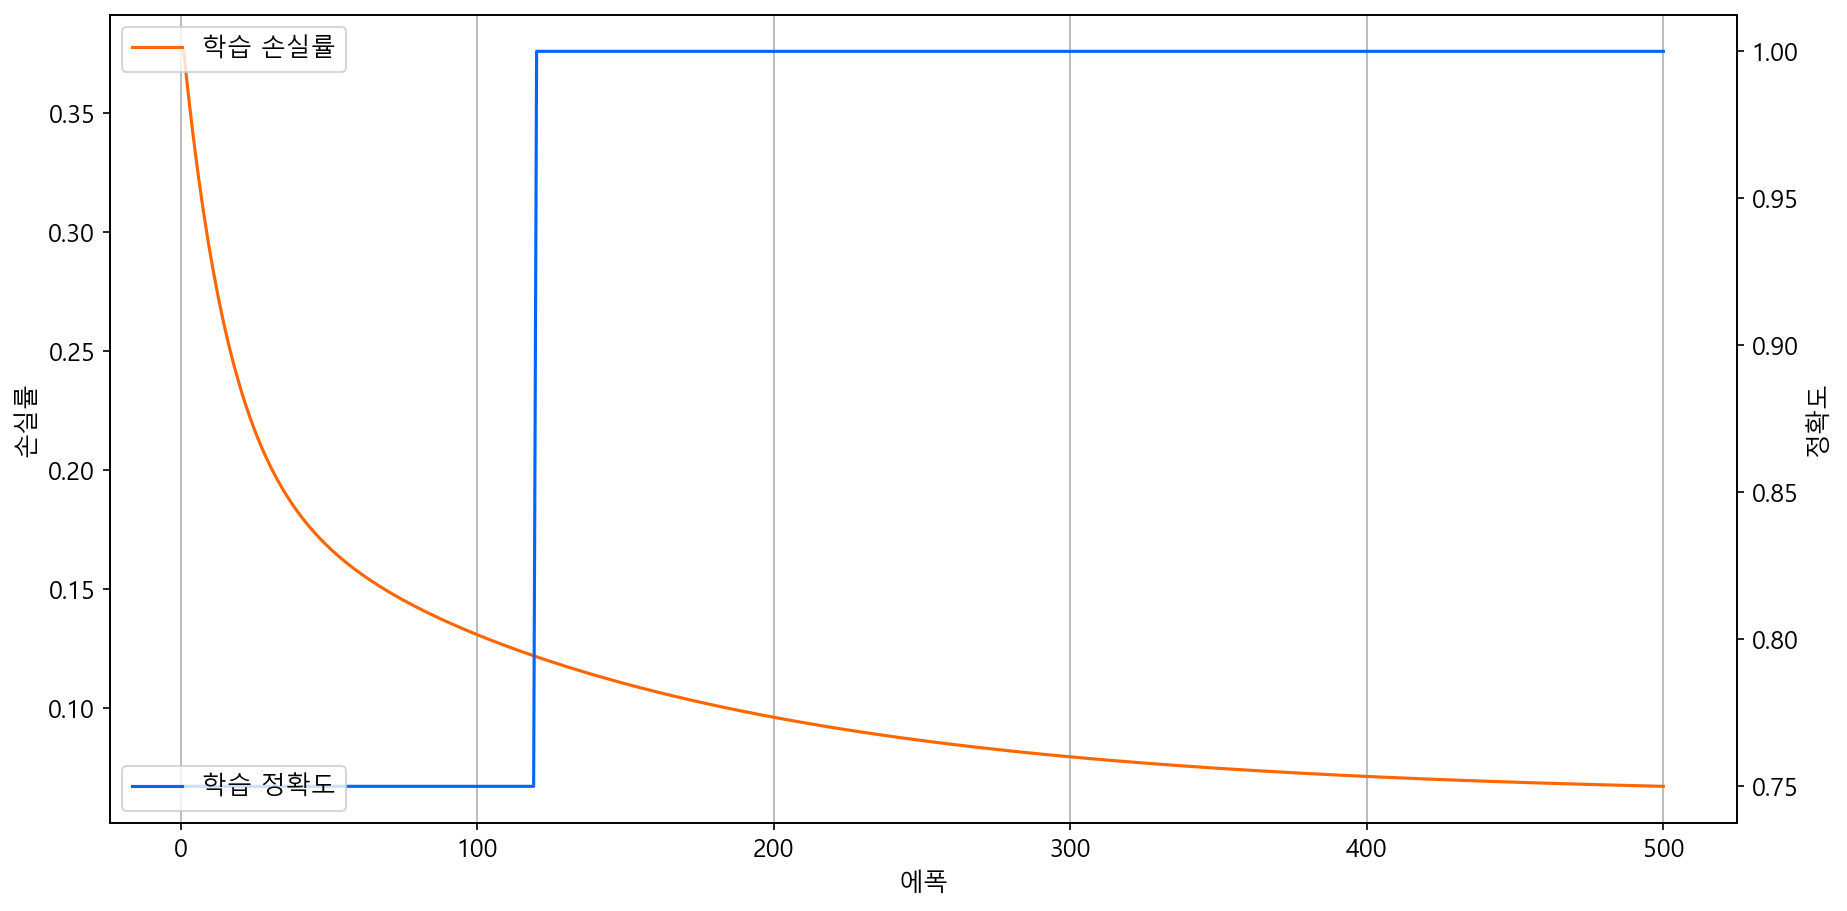

In [7]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12

fig, ax1 = plt.subplots(1, 1, figsize=(14, 7), dpi=150)
ax2 = ax1.twinx()

sns.lineplot(data=result_df, x=result_df.index, y='loss', color='#ff6600', label='학습 손실률', ax=ax1)
ax1.set_xlabel('에폭')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sns.lineplot(data=result_df, x=result_df.index, y='acc', color='#0066ff', label='학습 정확도', ax=ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

특정 수치 이후로는 정확도가 일관되어, 딱 맞는 정확도가 생기면 그 뒤를 break하는 방법으로 계산을 빠르게 할 수 있다. (위의 예제는 아님)

##### 모델 성능 평가

In [8]:
ev = model.evaluate(train_x, train_y)
print("손실률: %0.2f, 정확도: %0.2f" % (ev[0], ev[1]))

1/1 [==============================] - 0s 98ms/step - loss: 0.0669 - acc: 1.0000
손실률: 0.07%, 정확도: 1.00%


##### 가중치, 편향 확인

In [9]:
weight, bias = model.get_weights()
print("가중치: %s" % weight.flatten())
print("편향: %s" % bias.flatten())

가중치: [0.43623874 0.38774222]
편향: [-0.14560843]


#### 8) 학습 결과 적용

##### 단일 데이터에 대한 예측치 산정

In [10]:
r00 = model.predict([[0, 0]])
r00

1/1 [==============================] - 0s 197ms/step


array([[-0.14560843]], dtype=float32)

In [11]:
result = "%s OR %s => %s" % (bool(0), bool(0), bool(round(r00[0,0])))
result

'False OR False => False'

##### 학습 데이터 전체를 활용하여 예측값 만들기

In [12]:
r = model.predict(train_x)
r

1/1 [==============================] - 0s 16ms/step


array([[-0.14560843],
       [ 0.2906303 ],
       [ 0.2421338 ],
       [ 0.6783725 ]], dtype=float32)

In [13]:
df['예측값'] = r.reshape(-1).round()
df

,x1,x2,예측값
y,,,
0,0,0,-0.0
0,1,0,0.0
0,0,1,0.0
1,1,1,1.0


### 3. OR 게이트

1) 데이터 셋 준비하기

In [22]:
# 랜덤 시드값 고정
np.random.seed(779)

2) 데이터 셋 구성

In [23]:
train_x = np.array([[0,0],[1,0],[0,1],[1,1]])
train_y = np.array([[0],[1],[1],[1]])

3) 데이터 전처리

... 안 해

4) 탐색적 데이터 분석

In [25]:
label = train_y.flatten() # 2차원을 1차원으로 풀어버리기
df = DataFrame(train_x,index=label,columns=['x1','x2'])
df.index.name = 'y' # 안해도되지만헷갈리니까~
df

,x1,x2
y,,
0,0,0
1,1,0
1,0,1
1,1,1


5) 데이터 셋 분할하기

...안 해

6) 모델 개발

In [26]:
model = Sequential()
model.add(Dense(1,input_shape = (2,),activation = 'linear'))
model.compile(optimizer=SGD(),loss= mse,metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
hist = model.fit(train_x,train_y,epochs=400) #  train_x와 train_y 데이터를 사용하여 모델을 400번의 에포크(epoch) 동안 훈련합니다. 훈련 과정에서 발생하는 히스토리 정보는 hist 변수에 저장됩니다.
result = DataFrame(hist.history) # hist.history는 훈련 과정에서의 손실(loss) 및 정확도(accuracy) 등의 메트릭들을 포함한 딕셔너리입니다. 이를 DataFrame으로 변환하여 result에 저장합니다. 
result['epochs'] = result.index + 1 #  히스토리 데이터프레임에 'epochs'라는 열을 추가합니다. 이 열은 에포크 수를 나타내며, 인덱스에 1을 더함으로써 0부터 시작하는 인덱스를 1부터 시작하는 에포크 수로 변경합니다. 400까지.. 
result.set_index('epochs',inplace=True) # 'epochs' 열을 인덱스로 설정합니다. 이를 통해 데이터프레임의 인덱스를 에포크 수로 변경하여 데이터를 더 직관적으로 확인할 수 있습니다.
result

Epoch 1/400
1/1 [==============================] - 0s 290ms/step - loss: 1.3499 - acc: 0.2500
Epoch 2/400
1/1 [==============================] - 0s 4ms/step - loss: 1.2735 - acc: 0.2500
Epoch 3/400
1/1 [==============================] - 0s 3ms/step - loss: 1.2020 - acc: 0.2500
Epoch 4/400
1/1 [==============================] - 0s 6ms/step - loss: 1.1349 - acc: 0.2500
Epoch 5/400
1/1 [==============================] - 0s 3ms/step - loss: 1.0720 - acc: 0.2500
Epoch 6/400
1/1 [==============================] - 0s 3ms/step - loss: 1.0130 - acc: 0.2500
Epoch 7/400
1/1 [==============================] - 0s 5ms/step - loss: 0.9576 - acc: 0.2500
Epoch 8/400
1/1 [==============================] - 0s 4ms/step - loss: 0.9058 - acc: 0.2500
Epoch 9/400
1/1 [==============================] - 0s 3ms/step - loss: 0.8571 - acc: 0.2500
Epoch 10/400
1/1 [==============================] - 0s 5ms/step - loss: 0.8114 - acc: 0.2500
Epoch 11/400
1/1 [==============================] - 0s 5ms/step - loss: 0.768

,loss,acc
epochs,,
1,1.349856,0.25
2,1.273549,0.25
3,1.201996,0.25
4,1.134900,0.25
5,1.071982,0.25
...,...,...
396,0.068269,1.00
397,0.068232,1.00
398,0.068195,1.00


7) 학습결과 평가

 - 시각화

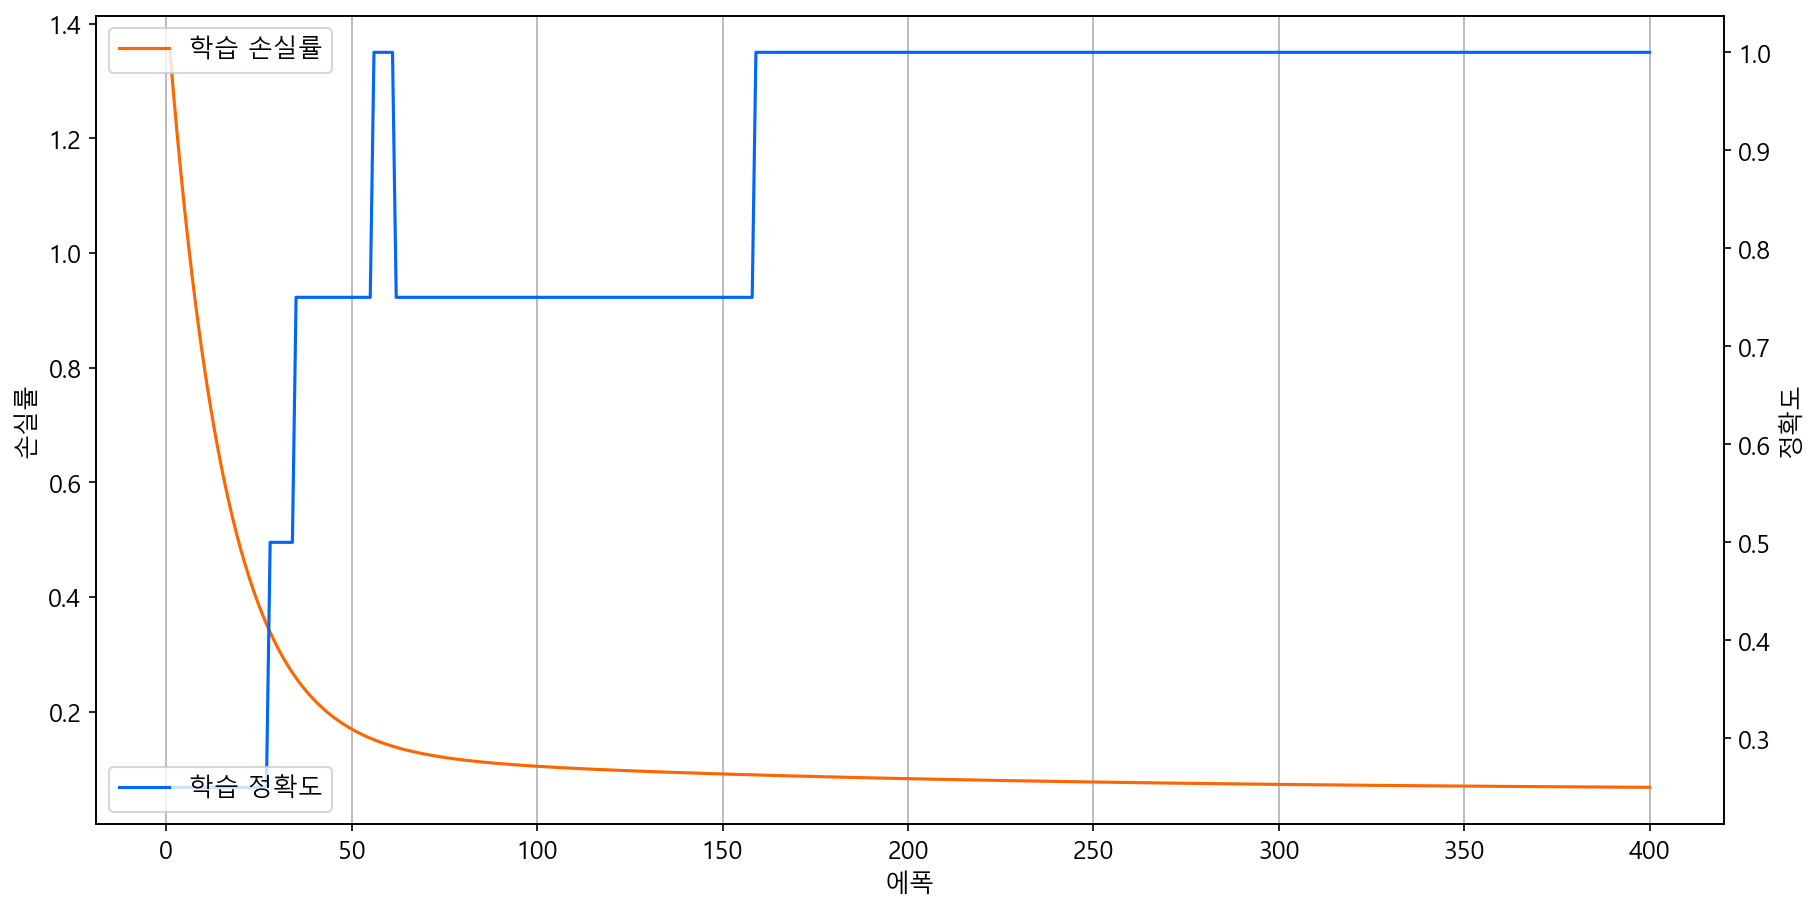

In [29]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12

fig, ax1 = plt.subplots(1, 1, figsize=(14, 7), dpi=150)
ax2 = ax1.twinx()

sns.lineplot(data=result, x=result.index, y='loss', color='#ff6600', label='학습 손실률', ax=ax1)
ax1.set_xlabel('에폭')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sns.lineplot(data=result, x=result.index, y='acc', color='#0066ff', label='학습 정확도', ax=ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

In [37]:
# 모델 성능 평가
#  model.evaluate() 함수는 모델을 평가하는 함수로 리스트의 첫 번째 요소는 평가 결과의 손실(loss), 그리고 두 번째 요소는 지정된 메트릭(예: 정확도)의 값을 반환함. 
# model.evaluate() 함수는 주어진 입력 데이터 train_x와 실제 타겟 데이터 train_y에 대해 모델을 평가합니다. 이 함수는 평가 결과를 리스트 형태로 반환하는데, 해당 리스트의 첫 번째 값은 손실(loss)이고, 두 번째 값은 메트릭(예: 정확도)입니다. 이 평가 결과를 ev 변수에 저장합니다.

ev = model.evaluate(train_x,train_y)
print('손실률: %0.3f, 정확도: %0.3f'%(ev[0],ev[1])) 

# 가중치, 편향 확인 -> 모델 식 나옴. 
weight, bias = model.get_weights()
print('가중치: %s' %weight.flatten())
print('편향: %s' %bias.flatten())


1/1 [==============================] - 0s 25ms/step - loss: 0.0681 - acc: 1.0000
손실률: 0.068, 정확도: 1.000
가중치: [0.3782474  0.42167354]
편향: [0.36865824]


8) 학습결과 적용

In [38]:
# 단일 데이터에 대한 예측치 산정

r00 = model.predict([[0,1]])
print(r00)

result_or = "%s or %s -> %s" %(bool(0),bool(0),bool(round(r00[0,0])))
print(result_or)

# 학습 데이터 전체를 활용하여 예측값 만들기

r = model.predict(train_x)
print(r)

df['예측값'] = r.reshape(-1).round()
df

1/1 [==============================] - 0s 31ms/step
[[0.7903318]]
False or False -> True
1/1 [==============================] - 0s 15ms/step
[[0.36865824]
 [0.7469057 ]
 [0.7903318 ]
 [1.1685791 ]]


,x1,x2,예측값
y,,,
0,0,0,0.0
1,1,0,1.0
1,0,1,1.0
1,1,1,1.0


In [54]:
x  = [0,1,2,3,1]
s = ""
for i in x :
    s += str(i)
s



'01231'